# Lab 2: Atomic Emission Spectrocopy

In this lab, you will measuring emission wavelengths, converting to frequencies, then making a best fit line within the Balmer series of transitions to determine the Rydberg constant. This constant will allow you to determine the energy of the orbitals involved in the electronic transition. 

We will be reading in data from a file and then making a best fit line. For your lab reports, you would need to use your own data that you collect during lab. If you want to use the same file name as is used here, store your emission wavelength data in LAB_2.H_emission_wavelengths.txt. Below, there is some code that you will need to modify to get the correct results for converting from wavelength to frequency, and for getting the Balmer series. The text will tell you where you need to change the code. 

First, load some of the python libraries.  This will help us with some calculations and making plots. 

In [11]:
import numpy
import scipy
import matplotlib.pyplot as plt
from scipy import stats

Our calculations will need some constants. It is good coding practice to define these at the beginning of your code. Look at the code to see how multiplication and exponents work in python. You will need to know this to set up the correct equations later in the code. 

In [1]:

# Constants we need for our calculations
# These also provide an example of how multiplication and exponents work in Python
c = 2.9979 * 10 ** 8 # speed of light in m/s 
h = 6.6261 * 10 ** -34  # Planck's constant in J*s  
mol = 6.0221 * 10 ** 23  # Avogradro's number

In [5]:
#### HYDROGEN EMISSION CALCULATIONS AND PLOT
print("\n HYDROGEN EMISSION CALCULATIONS AND PLOT \n")


 HYDROGEN EMISSION CALCULATIONS AND PLOT 



When we are making plots, we will be storing multiple data points in an array. So first we will set up some empty arrays that we will populate with data that you collected during lab.  It is good practice to name your arrays according to the data that you have.



In [2]:
# Set up empty arrays that we will populate with our measured data
wavelengths = [] 
frequencies = []

Next, you will read in the data from a text file. You will need to specify the name of the file, as well as how you have separated/delimited your values (e.g. are the values separated by spaces or commas?). You can skip initial lines of text that will be headers for your data.  If you are curious about this function call, you can search for numpy.genfromtxt to find out more information about how it works.

In [4]:
# Read in the wavelengths from the txt file 
H_atom_file = ('LAB_2.H_emission_wavelengths.txt')  
outfile = open(H_atom_file,"r")
data = outfile.readlines()
outfile.close()

Now we need to convert wavelength to frequencies.  The equation below is incorrect and just a placeholder. Modify the code to do the correct conversion (also make sure that you convert wavelength nm to m!). 

In [5]:
# Convert wavelength to frequencies
for value in data: 
    wavelength = float(value)
    wavelengths.append(wavelength)
    # set up the equation to convert wavelengths to frequency (also wavelength nm to m!), below is just a placeholder
    frequency = wavelength
    frequencies.append(frequency) 

Check your data by printing out the values for both the wavelength and the frequency arrays. 

In [6]:
print(wavelengths)
print(frequencies)
#for value in frequencies: 
#    print("%10.4E" % (value))

[657.0, 486.0, 434.0, 410.0]
[657.0, 486.0, 434.0, 410.0]


Does the data seem correct? If not, you might need to fix your code and rerun it. If yes, then next, set up Balmer series for the x-axis of your plot. The equation below is incorrect and you should fix it!
The Balmer series includes transitions to n=2, starting at n=3

In [7]:
Balmer_gaps = []
for i in range(3,len(wavelengths)+3):
    print(i)
    Balmer_gap = i ** 2
    Balmer_gaps.append(Balmer_gap)

3
4
5
6
7
8
9
10


In [8]:
print(Balmer_gaps)
#for value in Balmer_gaps: 
#    print("%1.5f" % (value))

[9, 16, 25, 36, 49, 64, 81, 100]


In [7]:
print("Wavelength(nm), Frequency(Hz)")
for i in range(0,len(wavelengths)):
    print("%10.2f, %10.4e" % (wavelengths[i], frequencies[i]))

Wavelength(nm), Frequency(Hz)
    657.00, 6.5700e+02
    486.00, 4.8600e+02
    434.00, 4.3400e+02
    410.00, 4.1000e+02


Now we do a linear regression to make a best fit line, just like in the practice Intro lab. 

In [12]:
print("\nDetermining best fit line... \n")
# Use linear regression to determine the best fit line
fit = stats.linregress(Balmer_gaps, frequencies)
print(f"R-squared: {fit.rvalue**2:.6f}")
print(f"Slope: {fit.slope:.6e}")
R_text = f"R^2 = {fit.rvalue**2:.4f}"
eqn_text = f"y = {fit.slope:.4e} x"
print(eqn_text)#$print(f"Equation of the fit: {fit.slope:.6e}")
#print(fit.slope)
#print(fit.intercept)


Determining best fit line... 

R-squared: 0.185246
Slope: -1.378337e+00
y = -1.3783e+00 x


Think about your values - do the slope and intercept make sense? Next we will use the slope from the fit to determine the fitted values for the plot

In [13]:
# Use slope from the fit to determine the fitted values for the plot
fit_Balmer_gaps = []
for value in Balmer_gaps:
    fit_Balmer_gap = fit.slope * value
    fit_Balmer_gaps.append(fit_Balmer_gap)

Time to make a plot! You need to make sure your plot has the correct title, x and y axes labels with units as appropriate, and that the location of the text is good. Modify the code below. 

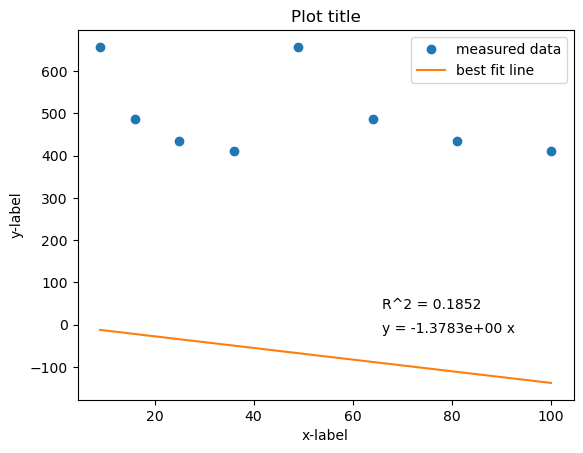

In [14]:
# Plot your data
# Change the text to represent the proper x and y axes values, and change the title
plt.figure()
plt.xlabel('x-label')
plt.ylabel('y-label')
plt.title("Plot title")
plt.plot(Balmer_gaps,frequencies, 'o', label='measured data')
plt.plot(Balmer_gaps,fit_Balmer_gaps, '-', label='best fit line')
plt.legend()
#adding text inside the plot
plt.figtext(0.6, 0.25, eqn_text)
plt.figtext(0.6, 0.3, R_text)
#plt.show()
plt.savefig('LAB_2.H_atom_emission.png')

How does the plot look? If you aren't happy with it, modify the code and regenerate the figure. If you are happy with it, then make sure you can save the png or take a screenshot for your report.  Next, we do the same thing with lithium and sodium. You need to put your measured data into the .txt files so the code below can read in the wavelengths. 

In [15]:
#### LITHIUM and SODIUM EMISSION CALCULATIONS
print("\n LITHIUM and SODIUM EMISSION CALCULATIONS \n")

# Read in the wavelengths from the txt file 
Li_Na_atom_file = ('LAB_2.Li_Na_emission_wavelengths.txt')
outfile = open(Li_Na_atom_file,"r")
data = outfile.readlines()
outfile.close()


 LITHIUM and SODIUM EMISSION CALCULATIONS 



In [16]:
# Read in the wavelengths from the txt file 
Li_Na_atom_file = ('LAB_2.Li_Na_emission_wavelengths.txt')
outfile = open(Li_Na_atom_file,"r")
data = outfile.readlines()
outfile.close()

Set up the arrays to be empty, then modify the equation to correctly convert wavelength to energies per mol of photons.

In [18]:
wavelengths = [] # Need to reset the array to be empty
energies_kJ_mol = []
# Convert wavelength to kJ/mol
for value in data: 
    wavelength = float(value)
    wavelengths.append(wavelength)
    # set up the equation to convert wavelengths to frequency (also wavelength nm to m!), below is just a placeholder
    energy_kJ_mol = wavelength 
    energies_kJ_mol.append(energy_kJ_mol) 

In [19]:
#print(wavelengths)
#print(energies_kJ_mol)
print("Wavelength(nm), E mol photons(kJ/mol)")
for i in range(0,len(wavelengths)):
    print("%10.2f, %10.2f" % (wavelengths[i], energies_kJ_mol[i]))

Wavelength(nm), E mol photons(kJ/mol)
    670.00,     670.00
    590.00,     590.00
    820.00,     820.00
